In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [159]:
df.shape

(1460, 3)

In [160]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
865,NaN,TA,148500
103,NaN,TA,198900
676,NaN,Fa,87000
1100,NaN,TA,60000
1261,NaN,TA,128900


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [162]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

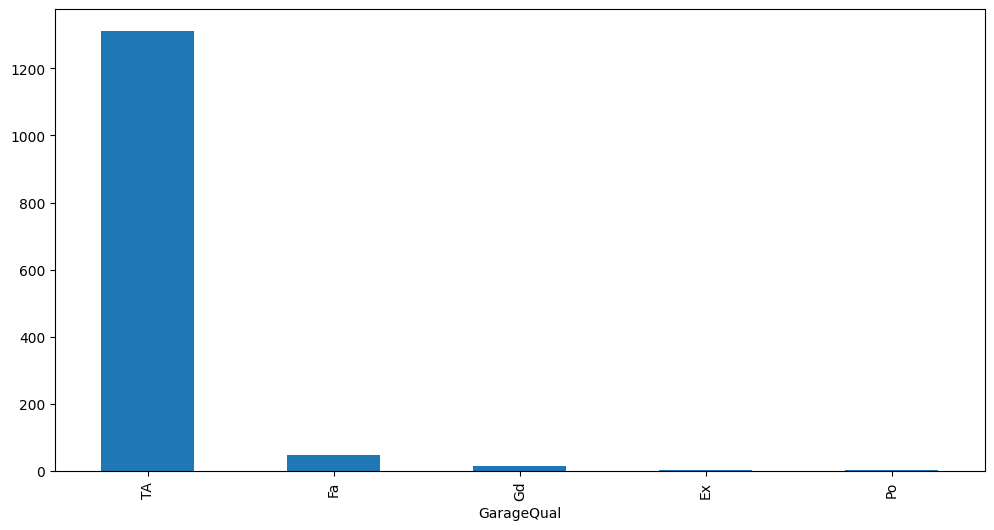

In [163]:
fig = plt.figure(figsize=(12, 6))
df['GarageQual'].value_counts().plot(kind='bar')
plt.show()

In [164]:
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

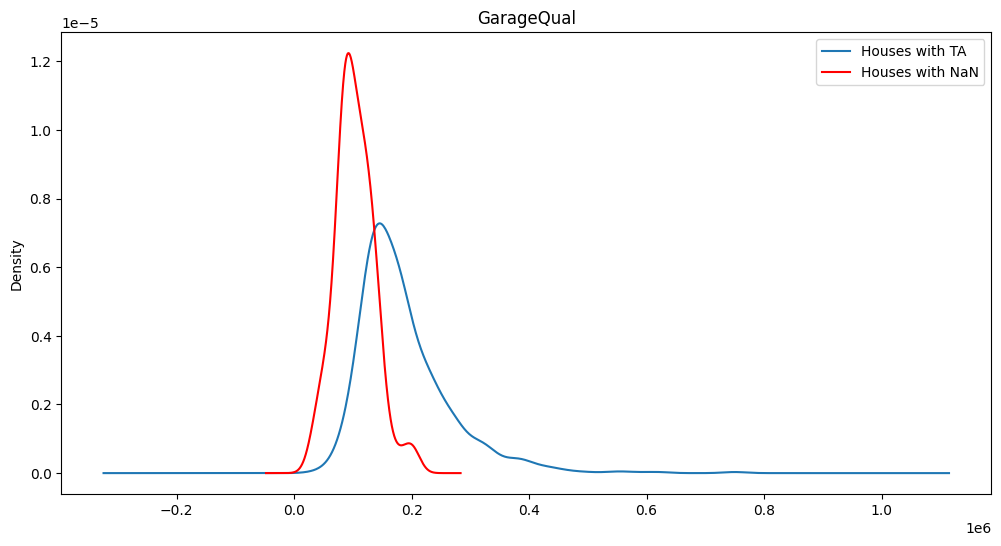

In [165]:
# Removing the missing values and compare before and after
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NaN']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')
plt.show()

In [166]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [167]:
df['GarageQual'].fillna('TA', inplace=True)

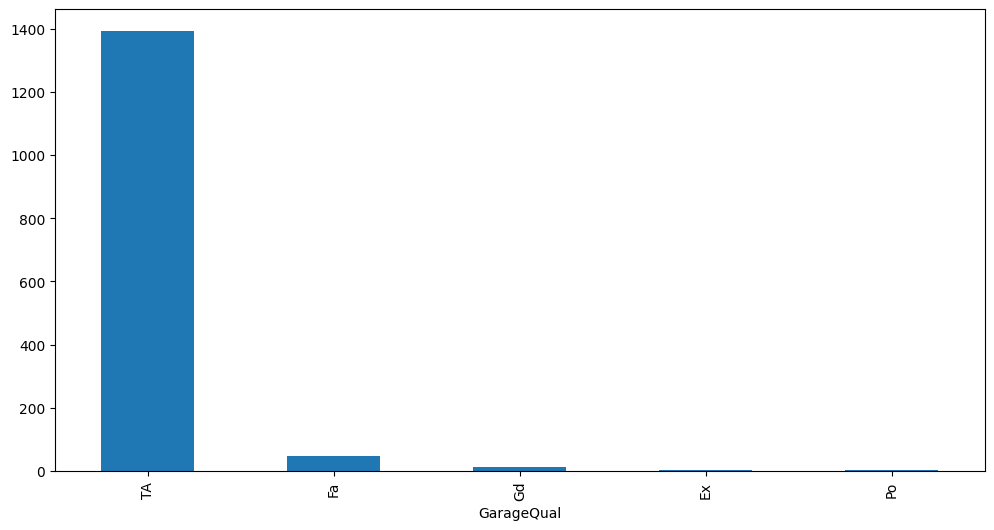

In [168]:
fig = plt.figure(figsize=(12, 6))
df['GarageQual'].value_counts().plot(kind='bar')
plt.show()

In [169]:
df['GarageQual'].value_counts()

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

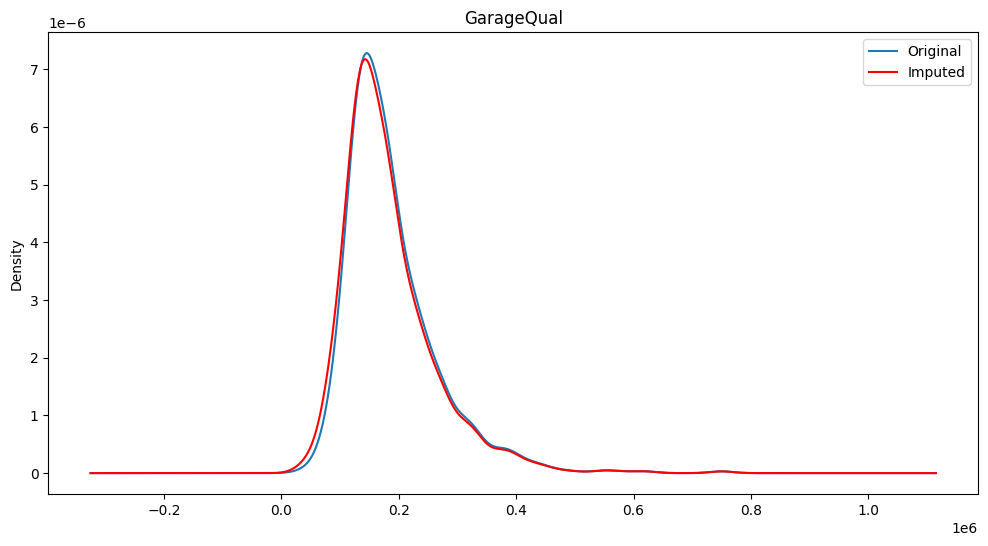

In [170]:
# Imputing the missing values and compare before and after
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputed']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')
plt.show()

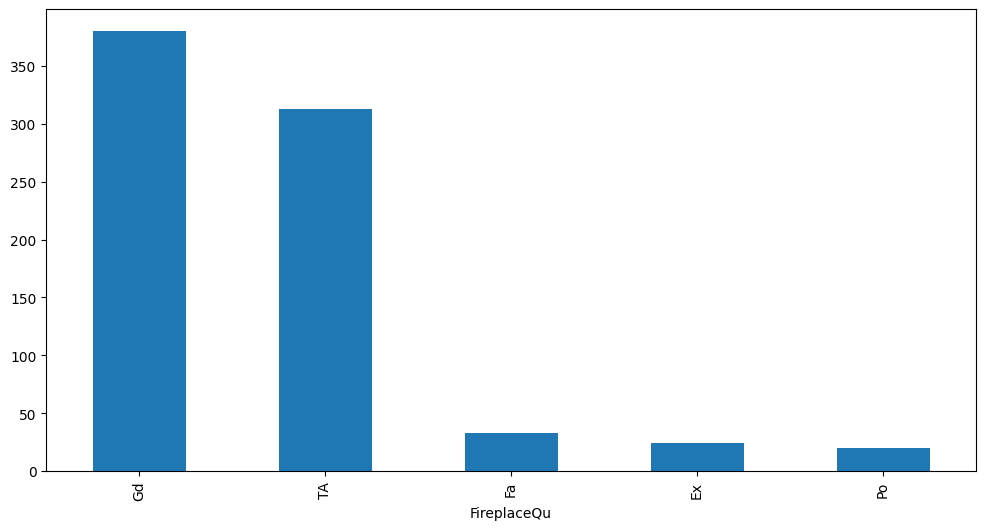

In [171]:
fig = plt.figure(figsize=(12, 6))
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

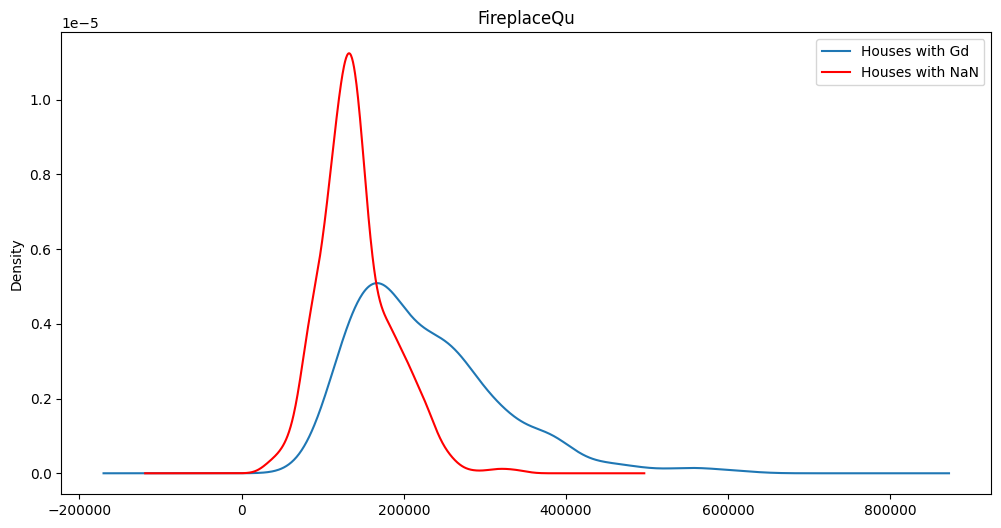

In [172]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NaN']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')
plt.show()

In [173]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [174]:
df['FireplaceQu'].fillna('Gd', inplace=True)

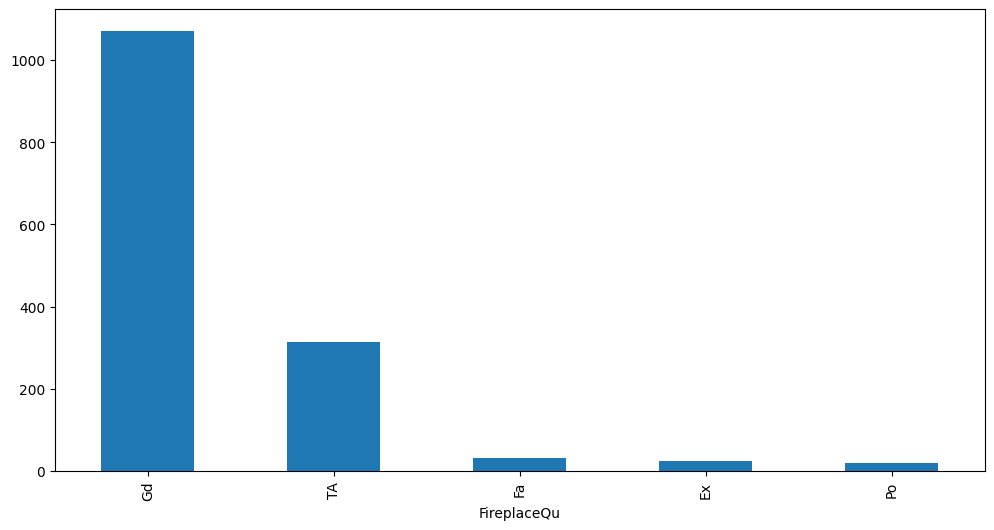

In [175]:
fig = plt.figure(figsize=(12, 6))
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

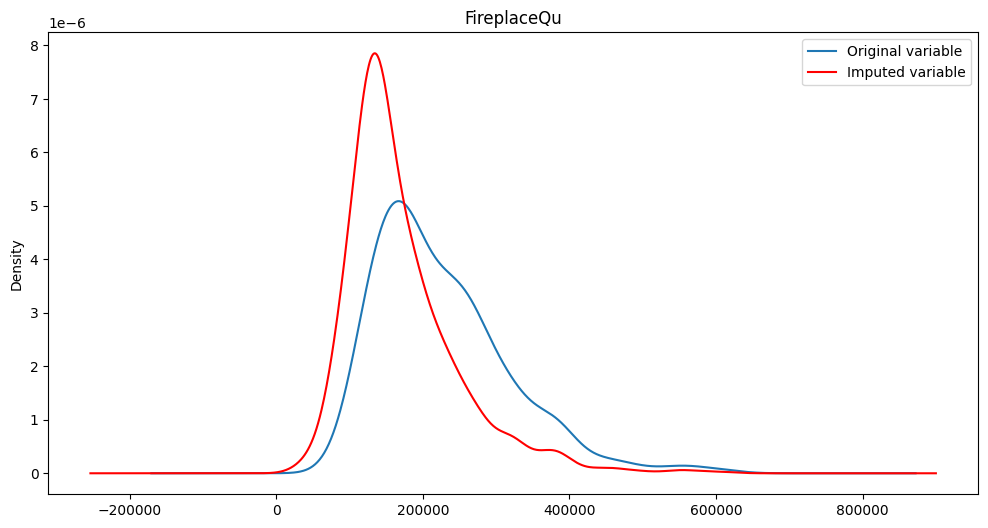

In [176]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')
plt.show()

## Using Scikit-Learn

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [178]:
from sklearn.impute import SimpleImputer

In [179]:
imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [180]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)